In [ ]:
import numpy as np
import sklearn
import mglearn
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
import matplotlib
import mpl_toolkits

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

# For two moon datasets

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver = 'lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")




In [ ]:
mlp = MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=10).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


In [ ]:
mlp = MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[10, 10, 10, 10], activation='tanh').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")


In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))
        

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_classification(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

# For Breat Cancer Example

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per feature maxima:\n{}".format(cancer.data.max(axis=0)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


In [ ]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set after training with scaled data: {:.4f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set after training with scaled data: {:.2f}".format(mlp.score(X_test_scaled, y_test)))


In [ ]:
mlp = MLPClassifier(random_state=0, alpha=1, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set after training with scaled data: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set after training with scaled data: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


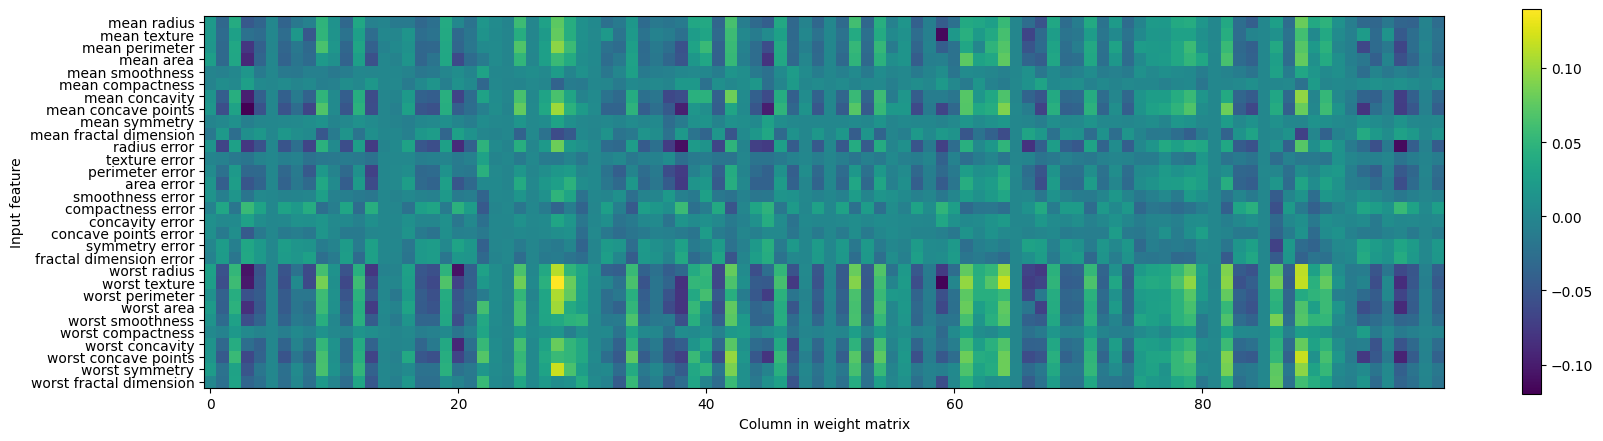

In [41]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Column in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()
